# BoosterRamp

Examples on how to use **<code>siriuspy.ramp.ramp.BooterRamp</code>** objects.

In [2]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util

## Create a new configuration from scratch, save to conig server and delete it

### create and set value

In [3]:
# create booster ramp configuration object
cname = 'ttestt'
r = ramp.BoosterRamp(cname)

In [4]:
# object is not synchronized yet with server since its configuration does now exists
print('synchronized: {}'.format(r.configsrv_synchronized))

# and also its config value is still invalid
print('valid value : {}'.format(r.check_value()))
print()

# print configuration field - by default it uses the template value
print(r)

synchronized: False
valid value : True

name                              : ttestt
delay_rf [us]                     : 0.0
ramp_dipole_delay [us]            : 0.0
ramp_dipole_duration [ms]         : 490.0
injection_time [ms]               : 019.605
ejection_time [ms]                : 294.074
ramp_dipole_time_energy [ms] [GeV]: 
                                  : 000.000 +000.030 (start)
                                  : 012.743 +000.079 (rampup_start)
                                  : 303.876 +003.102 (rampup_stop)
                                  : 310.841 +003.150 (plateau_start)
                                  : 324.335 +003.150 (plateau_stop)
                                  : 335.244 +003.000 (rampdown_start)
                                  : 470.518 +000.210 (rampdown_stop)
                                  : 490.000 +000.030 (stop)
normalized_configs [ms] [name]    : 
                                  : 012.743 rampup-start
                                  : 303.876 

In [5]:
# print normalized configs names
print('config names:', r.normalized_configs_names)
print()

# get symbol to one normalized configuration object
n1 = r['rampup-start']

# modify config
n1['BO-03U:MA-CH'] = 0.001

# print normalized configuration
print(n1)

r['rampup-start'] = n1

config names: ['rampup-start', 'rampup-stop']

name        : rampup-start
BO-Fam:MA-B : +0.150000
BO-Fam:MA-QD: +0.001120
BO-Fam:MA-QF: +0.377100
BO-02D:MA-QS: +0.000000
BO-Fam:MA-SD: +0.525838
BO-Fam:MA-SF: +1.189851
BO-01U:MA-CH: +0.000000
BO-03U:MA-CH: +0.001000
BO-05U:MA-CH: +0.000000
BO-07U:MA-CH: +0.000000
BO-09U:MA-CH: +0.000000
BO-11U:MA-CH: +0.000000
BO-13U:MA-CH: +0.000000
BO-15U:MA-CH: +0.000000
BO-17U:MA-CH: +0.000000
BO-19U:MA-CH: +0.000000
BO-21U:MA-CH: +0.000000
BO-23U:MA-CH: +0.000000
BO-25U:MA-CH: +0.000000
BO-27U:MA-CH: +0.000000
BO-29U:MA-CH: +0.000000
BO-31U:MA-CH: +0.000000
BO-33U:MA-CH: +0.000000
BO-35U:MA-CH: +0.000000
BO-37U:MA-CH: +0.000000
BO-39U:MA-CH: +0.000000
BO-41U:MA-CH: +0.000000
BO-43U:MA-CH: +0.000000
BO-45U:MA-CH: +0.000000
BO-47U:MA-CH: +0.000000
BO-49D:MA-CH: +0.000000
BO-01U:MA-CV: +0.000000
BO-03U:MA-CV: +0.000000
BO-05U:MA-CV: +0.000000
BO-07U:MA-CV: +0.000000
BO-09U:MA-CV: +0.000000
BO-11U:MA-CV: +0.000000
BO-13U:MA-CV: +0.000000
BO-15U:MA-CV: 

### save configuration to server

In [6]:
# save current configuration to ConfigSrv
r.configsrv_save()

### list configurations stored in server

In [12]:
# list all configurations in ConfigSrv:
metadata = r.configsrv_find()
print('number of configs: {}'.format(len(metadata)))
print()
for m in metadata:
    tstamp = r.conv_timestamp_flt_2_txt(m['created'])
    print('name:{:<10s}, id:{:<20s}, created:{}'.format(m['name'], m['_id'], tstamp))

number of configs: 3

name:test1     , id:5b071a77c692cc000db36ab3, created:2018-05-24 17:03:03.911460
name:test2     , id:5b071a8bc692cc000db36ab4, created:2018-05-24 17:03:23.110850
name:test3     , id:5b32ba8fa6e9d6000d0e470f, created:2018-06-26 19:13:35.314711


### delete configurations

In [11]:
# delete all configuration created in ipython
r.configsrv_delete()

## Loading an Existing Configuration and changing it

### Load

In [2]:
# creating object
r = ramp.BoosterRamp('test3')

# loading from ConfigSrv
r.configsrv_load()

# print configuration
print(r)

name                              : test3
delay_rf [us]                     : 0.0
ramp_dipole_delay [us]            : 0.0
ramp_dipole_duration [ms]         : 490.0
injection_time [ms]               : 019.605
ejection_time [ms]                : 294.074
ramp_dipole_time_energy [ms] [GeV]: 
                                  : 000.000 +000.030 (start)
                                  : 012.743 +000.079 (rampup_start)
                                  : 303.876 +303.876 (rampup_stop)
                                  : 310.841 +003.150 (plateau_start)
                                  : 324.335 +003.150 (plateau_stop)
                                  : 335.244 +003.000 (rampdown_start)
                                  : 470.518 +000.210 (rampdown_stop)
                                  : 490.000 +000.030 (stop)
normalized_configs [ms] [name]    : 
                                  : 012.743 rampup-start
                                  : 303.876 rampup-stop



### Change and Update ConfigSrv

In [ ]:
# gets symbol to one of the normalized configurations
n1 = r['rampup-start']

# rename ramp configuration
r.name = 'ipython-test-test1'


# change its energy
n1['BO-Fam:MA-B'] = 0.20

# check validity
print('valid value : {}'.format(r.check_value()))

# save ramp config back to ConfigSrv with a different name
r.configsrv_save()

# list all ramp config in ConfigSrv
print('list with ramp configurations in ConfigServ:')
metadata = r.configsrv_find()
for m in metadata:
    print('-> {}'.format(m['name']))
    
# delete test configs
print()
delete_test_configs(r)

## Manipulating normalized Configurations

In [ ]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util

r = ramp.BoosterRamp('test1')
r.configsrv_load()

# print previous config table
print('Normalized config table:')
print(r.normalized_configs)
print()

# insert new configuration
name1 = r.normalized_configs_insert(0.20)
name2 = r.normalized_configs_insert(0.30)
name3 = r.normalized_configs_insert(0.25)

# print current config table
print('Normalized config table:')
print(r.normalized_configs)
print()

# print normalized configurations
n1 = r[name1]
n2 = r[name2]
n3 = r[name3]
c = n3.configuration
for k in c.keys():
    print('{:<12}: {:+.6f} {:+.6f} {:+.6f}'.format(k, n1[k], n3[k], n2[k]))


# check validity
print('valid value : {}'.format(r.check_value()))

## Manipulating dipole ramp 

### Load existing ramp configuration

name                              : test3
delay_rf [us]                     : 0.0
ramp_dipole_delay [us]            : 0.0
ramp_dipole_duration [ms]         : 490.0
injection_time [ms]               : 019.605
ejection_time [ms]                : 294.074
ramp_dipole_time_energy [ms] [GeV]: 
                                  : 000.000 +000.030 (start)
                                  : 012.743 +000.079 (rampup_start)
                                  : 303.876 +003.102 (rampup_stop)
                                  : 310.841 +003.150 (plateau_start)
                                  : 324.335 +003.150 (plateau_stop)
                                  : 335.244 +003.000 (rampdown_start)
                                  : 470.518 +000.210 (rampdown_stop)
                                  : 490.000 +000.030 (stop)
normalized_configs [ms] [name]    : 
                                  : 012.743 rampup-start
                                  : 303.876 rampup-stop

Initial ramp config
start_va

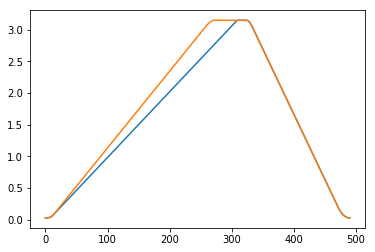

In [5]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util
import matplotlib.pyplot as plt

# creating object
r = ramp.BoosterRamp('test3')

# loading from ConfigSrv
r.configsrv_load()

# print configuration
print(r)


# get original dipole waveform
w1 = r.waveform_get('BO-Fam:MA-B')

# print initial ramp config
print('Initial ramp config')
print('===================')
print('{:<20s}: {} [GeV]'.format('start_value', r.start_energy))
print('{:<20s}: {} [GeV]'.format('rampup_start_value', r.rampup_start_energy))
print('{:<20s}: {} [GeV]'.format('rampup_stop_value', r.rampup_stop_energy))
print('{:<20s}: {} [GeV]'.format('ramp_plateau_value', r.plateau_energy))
print()
print('{:<20s}: {} [ms]'.format('rampup_start_time', r.rampup_start_time))
print('{:<20s}: {} [ms]'.format('rampup_stop_time', r.rampup_stop_time))
print('{:<20s}: {} [ms]'.format('rampdown_start_time', r.rampdown_start_time))
print('{:<20s}: {} [ms]'.format('rampdown_stop_time', r.rampdown_stop_time))

# change value of rampup-start
r.rampup_stop_time = r.rampup_stop_time - 50  
r.rampup_stop_energy = r.rampup_stop_energy - 0.1

# print initial ramp config
print()
print('Final ramp config')
print('===== ===========')
print('{:<20s}: {} [GeV]'.format('ramp_start_value', r.start_energy))
print('{:<20s}: {} [GeV]'.format('rampup_start_value', r.rampup_start_energy))
print('{:<20s}: {} [GeV]'.format('rampup_stop_value', r.rampup_stop_energy))
print('{:<20s}: {} [GeV]'.format('ramp_plateau_value', r.plateau_energy))
print()
print('{:<20s}: {} [ms]'.format('rampup_start_time', r.rampup_start_time))
print('{:<20s}: {} [ms]'.format('rampup_stop_time', r.rampup_stop_time))
print('{:<20s}: {} [ms]'.format('rampdown_start_time', r.rampdown_start_time))
print('{:<20s}: {} [ms]'.format('rampdown_stop_time', r.rampdown_stop_time))

# get modified dipole waveform
w2 = r.waveform_get('BO-Fam:MA-B')

# compare the two waveforms
print()
print('Waveform comparison: before and after')
plt.plot(w1.times, w1)
plt.plot(w2.times, w2)
plt.show()

## Read normalized configurations

In [10]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util
import matplotlib.pyplot as plt

# creating object
r = ramp.BoosterRamp('test3')

# loading from ConfigSrv
r.configsrv_load()

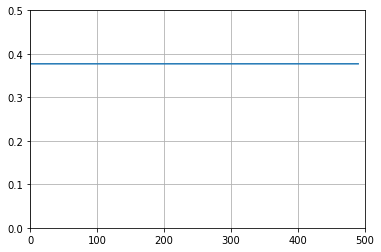

In [20]:
times = r.waveform_get_times()
w = r.waveform_get('BO-Fam:MA-QF')
strengths = w.strengths

plt.plot(times, strengths)
plt.xlim(0,500)
plt.ylim(0,0.5)
plt.grid()
plt.show()